<u><h3 align="center">Packages required</h3></u>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()
from scipy import stats
import statistics
plt.style.use("fivethirtyeight")

<u><h3 align="center">Importing the dataset</h3><u>

In [41]:
cars_data = pd.read_csv('Cars.csv')
cars = cars_data.copy()   #making a copy of the original data

<u><h3 align="center">Understanding the dataset</h3><u>

In [42]:
cars.shape

(6019, 13)

In [43]:
cars.head()  

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [44]:
# maximum and minimum year
print('Min:',min(cars.Year))   
print('Max:',max(cars.Year))

Min: 1998
Max: 2019


In [45]:
cars.columns    # different columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [7]:
print(cars.Location.unique())        # different locations 

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [8]:
cars['Location'].value_counts().rename("No of cars").reset_index()  # no of cars in different location

,index,No of cars
0,Mumbai,790
1,Hyderabad,742
2,Kochi,651
3,Coimbatore,636
4,Pune,622
5,Delhi,554
6,Kolkata,535
7,Chennai,494
8,Jaipur,413
9,Bangalore,358


<u><h3 align="center">Data Cleaning</h3></u>

In [46]:
cars.isna().any()

Name                 False
Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage               True
Engine                True
Power                 True
Seats                 True
New_Price             True
Price                False
dtype: bool

In [47]:
missing_report = cars.isnull().sum().reset_index().assign(
    misisng_percentage=lambda x: x[0]/cars.shape[0] * 100).sort_values(
    by="misisng_percentage", ascending=False).rename(columns={"index": "column name", 0: "missing row count", 
                                                              "misisng_percentage" : "missing percentage"})

missing_report = missing_report[missing_report['missing percentage']>0]
missing_report

,column name,missing row count,missing percentage
11,New_Price,5195,86.310018
10,Seats,42,0.697790
8,Engine,36,0.598106
9,Power,36,0.598106
7,Mileage,2,0.033228


In [48]:
cars['Fuel_Type'].value_counts().rename("No of cars").reset_index()

,index,No of cars
0,Diesel,3205
1,Petrol,2746
2,CNG,56
3,LPG,10
4,Electric,2


In [49]:
print(cars.shape)
cars = cars.loc[
    (cars["Fuel_Type"]=="Petrol")
    | (cars["Fuel_Type"]=="Diesel")
]
print(cars.shape)
cars['Fuel_Type'].value_counts().rename("Freq").reset_index().assign(
    percentage=lambda x: x['Freq']/cars.shape[0])


(6019, 13)
(5951, 13)


,index,Freq,percentage
0,Diesel,3205,0.538565
1,Petrol,2746,0.461435


([<matplotlib.patches.Wedge at 0x19564c7d588>,
 [Text(-0.13294499885626307, 1.0919366406889681, 'Diesel'),
  Text(0.13294489662177583, -1.0919366531361723, 'Petrol')])

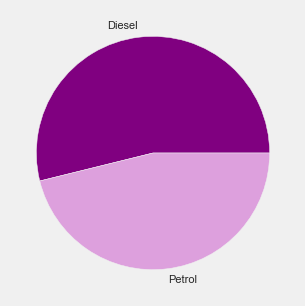

In [39]:
ft_valuecounts = cars['Fuel_Type'].value_counts(normalize = True)*100
plt.figure(figsize=(5,5))
colors = ['purple','plum']
plt.pie(ft_valuecounts.values,labels = ft_valuecounts.index,colors=colors)

In [13]:
68/6019 * 100  # % of data lost

1.1297557733842831

         index  Location
0       Mumbai       771
1    Hyderabad       733
2        Kochi       643
3   Coimbatore       636
4         Pune       608
5        Delhi       544
6      Kolkata       535
7      Chennai       491
8       Jaipur       411
9    Bangalore       358
10   Ahmedabad       221

MODE = ModeResult(mode=array(['Mumbai'], dtype=object), count=array([771]))


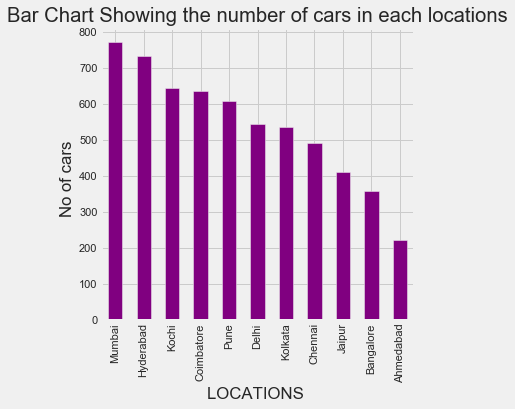

In [15]:
print(cars['Location'].value_counts().reset_index())

plt.figure(figsize=(5,5))
cars['Location'].value_counts().plot.bar(x = 'Location',color= "purple")
plt.xlabel("LOCATIONS ")
plt.ylabel("No of cars  ")
plt.title("Bar Chart Showing the number of cars in each locations")
print()
print("MODE =",stats.mode(cars.Location))

       index  No of cars
0     Manual        4233
1  Automatic        1718


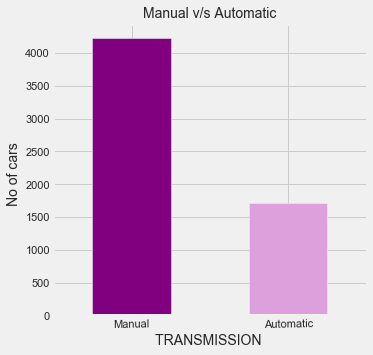

In [16]:
print(cars['Transmission'].value_counts().rename('No of cars').reset_index())

transm = cars['Transmission'].value_counts()
plt.figure(figsize=(5,5))
plt.style.use("fivethirtyeight")
plt.xlabel("TRANSMISSION ",fontsize=14)
plt.ylabel("No of cars  ",fontsize=14)
plt.title("Manual v/s Automatic",fontsize=14)
transm.plot.bar(x = 'Transmission',color= ('purple','plum'),rot = 1)

Text(0.5, 1.0, 'Price of cars based on the transmission ')

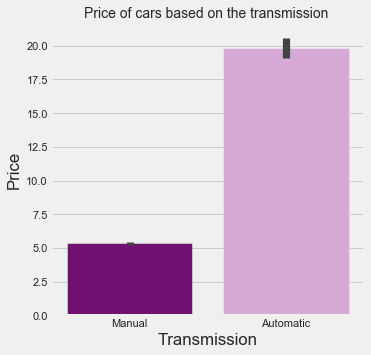

In [17]:
plt.figure(figsize=(5,5))
sns.barplot(x = cars.Transmission, y = cars.Price,palette=['purple','plum'])
plt.title("Price of cars based on the transmission ",fontsize=14)

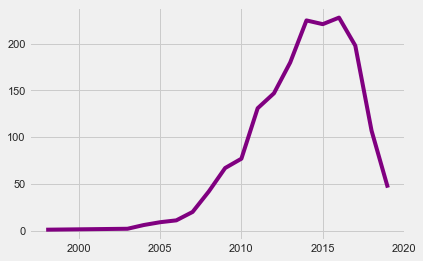

In [32]:
# Time Series plot
ts_auto=cars.loc[cars.Transmission == 'Automatic','Year'].value_counts(sort = False)
plt.plot(ts_auto.index,ts_auto.values,color = 'Purple')

Text(0.5, 1.0, 'Mileage of cars based on the transmission ')

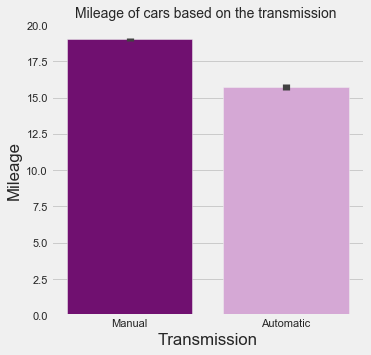

In [34]:
plt.figure(figsize=(5,5))
sns.barplot(x = cars.Transmission, y = cars.Mileage,palette=['purple','plum'])
plt.title("Mileage of cars based on the transmission ",fontsize=14)

In [18]:
cars.groupby(['Fuel_Type', 'Transmission']).size().rename("Freq").reset_index().assign(percentage=lambda x: x['Freq']/cars.shape[0])

,Fuel_Type,Transmission,Freq,percentage
0,Diesel,Automatic,1108,0.186187
1,Diesel,Manual,2097,0.352378
2,Petrol,Automatic,610,0.102504
3,Petrol,Manual,2136,0.358931


In [50]:
cars['Owner_Type'].value_counts().rename('No of people').reset_index()

,index,No of people
0,First,4874
1,Second,956
2,Third,112
3,Fourth & Above,9


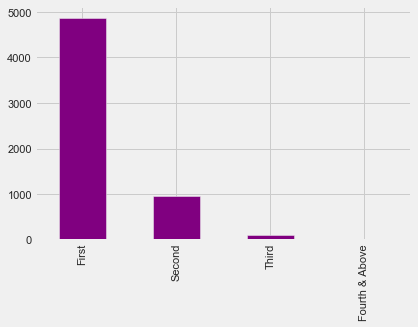

In [21]:
cars['Owner_Type'].value_counts().plot.bar(x = 'Location',color= "purple")

In [51]:
(cars['Year'].value_counts().sort_index().rename('Count').reset_index())

,index,Count
0,1998,4
1,1999,2
2,2000,4
3,2001,8
4,2002,15
5,2003,17
6,2004,31
7,2005,56
8,2006,78
9,2007,124


    index  Count
0    1998      4
1    1999      2
2    2000      4
3    2001      8
4    2002     15
5    2003     17
6    2004     31
7    2005     56
8    2006     78
9    2007    124
10   2008    172
11   2009    198
12   2010    337
13   2011    463
14   2012    569
15   2013    640
16   2014    785
17   2015    735
18   2016    736
19   2017    582
20   2018    294
21   2019    101

 MODE =  2014


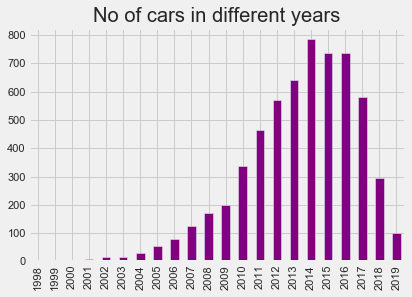

In [22]:
cars['Year'].value_counts().sort_index().plot(kind = 'bar',title = 'No of cars in different years',color= "purple")
print("\n MODE = ",statistics.mode(cars['Year']))

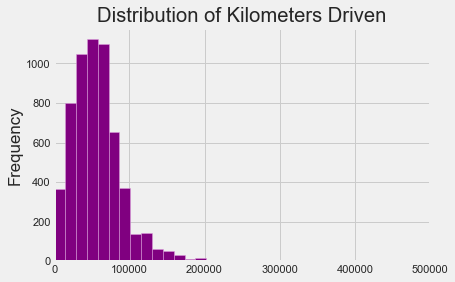

Targetting point for selling a car = 58771.24348848933


In [23]:
cars['Kilometers_Driven'].astype(int).plot(kind = 'hist',bins = 450,edgecolor = 'plum',title = "Distribution of Kilometers Driven",color= "purple")
plt.xlim([-5, 500000])
plt.show()

print(f"Targetting point for selling a car = {cars['Kilometers_Driven'].astype(int).dropna().mean()}")

In [24]:
# Name of cars editing

len(set(cars['Name']))
cars['Name'] = cars['Name'].str.upper()
cars['Name'].value_counts().head(10).rename("Count").reset_index()

,index,Count
0,MARUTI SWIFT DZIRE VDI,50
1,MAHINDRA XUV500 W8 2WD,49
2,MARUTI SWIFT VDI,45
3,HONDA CITY 1.5 S MT,34
4,MARUTI SWIFT VDI BSIV,31
5,HYUNDAI I10 SPORTZ,30
6,MARUTI RITZ VDI,30
7,TOYOTA FORTUNER 3.0 DIESEL,29
8,MARUTI SWIFT DZIRE VXI,29
9,HYUNDAI GRAND I10 SPORTZ,27


In [25]:
def car_name(x):
    x_list = x.split(" ")
    x_new = x_list[:-1]
    x_new = " ".join(x_new)
    return x_new

cars['Cars_Name'] = cars['Name'].apply(lambda x: car_name(x))
print(len(set(cars['Cars_Name'])))
cars['Name'].value_counts().head(10).rename("Count").reset_index()

1329


,index,Count
0,MARUTI SWIFT DZIRE VDI,50
1,MAHINDRA XUV500 W8 2WD,49
2,MARUTI SWIFT VDI,45
3,HONDA CITY 1.5 S MT,34
4,MARUTI SWIFT VDI BSIV,31
5,HYUNDAI I10 SPORTZ,30
6,MARUTI RITZ VDI,30
7,TOYOTA FORTUNER 3.0 DIESEL,29
8,MARUTI SWIFT DZIRE VXI,29
9,HYUNDAI GRAND I10 SPORTZ,27


['HYUNDAI' 'HONDA' 'MARUTI' 'AUDI' 'NISSAN' 'TOYOTA' 'VOLKSWAGEN' 'TATA'
 'LAND' 'MITSUBISHI' 'RENAULT' 'MERCEDES-BENZ' 'BMW' 'MAHINDRA' 'FORD'
 'PORSCHE' 'DATSUN' 'JAGUAR' 'VOLVO' 'CHEVROLET' 'SKODA' 'MINI' 'FIAT'
 'JEEP' 'SMART' 'AMBASSADOR' 'ISUZU' 'FORCE' 'BENTLEY' 'LAMBORGHINI']

 MODE =  MARUTI


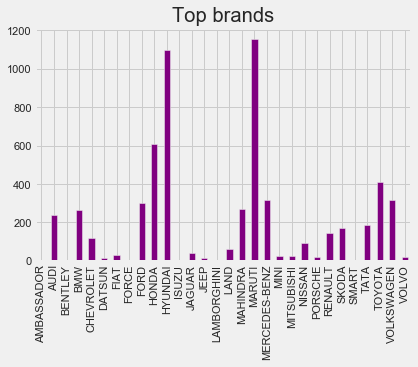

In [26]:
cars['Brand Name'] = cars['Name'].apply(lambda x: x.split(" ")[0])
print(cars['Brand Name'].unique())

cars['Brand Name'].value_counts().sort_index().plot(kind = 'bar',title = 'Top brands',color= "purple")
print("\n MODE = ",statistics.mode(cars['Brand Name']))

In [27]:
# Subtrings

# a) Mileage
cars["Mileage"] = cars["Mileage"].str.replace(" kmpl", "")
cars["Mileage"] = cars["Mileage"].str.replace(" km/kg","")
cars["Mileage"] = cars["Mileage"].astype(float)

# b) Engine
cars["Engine"] = cars["Engine"].str.replace("CC", "")
cars["Engine"] = cars["Engine"].astype(float)

# c) New_Price
cars["New_Price"] = cars["New_Price"].str.replace("Lakh", "")
cars["New_Price"] = cars["New_Price"].str.replace("Cr", "")
cars["New_Price"] = cars["New_Price"].astype(float)

# d) Power
cars["Power"] = cars["Power"].str.replace("null bhp", "")
cars["Power"] = cars["Power"].str.replace(" bhp", "")
cars["Power"] = cars["Power"].str.replace("null", "")
cars["Power"] = pd.to_numeric(cars["Power"],errors = 'coerce')

In [28]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Cars_Name,Brand Name
1,HYUNDAI CRETA 1.6 CRDI SX OPTION,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,HYUNDAI CRETA 1.6 CRDI SX,HYUNDAI
2,HONDA JAZZ V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,HONDA JAZZ,HONDA
3,MARUTI ERTIGA VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,MARUTI ERTIGA,MARUTI
4,AUDI A4 NEW 2.0 TDI MULTITRONIC,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,AUDI A4 NEW 2.0 TDI,AUDI
6,NISSAN MICRA DIESEL XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,NISSAN MICRA DIESEL,NISSAN


In [29]:
cars[cars['Mileage']>0].groupby(['Brand Name']).agg(['min','mean','median','max','count'])

Year                                 Kilometers_Driven  \
                min         mean median   max count               min   
Brand Name                                                              
AMBASSADOR     2003  2003.000000   2003  2003     1             80000   
AUDI           2008  2013.621277   2014  2019   235              6773   
BENTLEY        2006  2006.000000   2006  2006     1             48000   
BMW            2006  2013.056180   2013  2019   267              1400   
CHEVROLET      2004  2011.570248   2012  2018   121              8700   
DATSUN         2016  2016.538462   2016  2018    13              6000   
FIAT           2005  2012.222222   2011  2018    27             17941   
FORCE          2014  2014.000000   2014  2014     3             41000   
FORD           2002  2013.200669   2014  2019   299              1000   
HONDA          1999  2013.082645   2014  2019   605              1700   
HYUNDAI        2001  2013.685741   2014  2019  1066              1000   
ISUZU          2017  2017.333333   2017  2018     3             20422   
JAGUAR         2011  2014.400000   2015  2018    40              1000   
JEEP           2017  2017.600000   2018  2019    15              4000   
LAMBORGHINI    2011  2011.000000   2011  2011     1              6500   
LAND           2010  2014.705882   2014  2019    51             17201   
MAHINDRA       2000  2013.784387   2014  2019   269              2200   
MARUTI         1998  2013.435121   2014  2019  1156               171   
MERCEDES-BENZ  1998  2013.464052   2014  2019   306              2526   
MINI           2012  2015.076923   2015  2019    26              2000   
MITSUBISHI     2001  2011.111111   2012  2019    27              8900   
NISSAN         2008  2013.186813   2013  2018    91              8000   
PORSCHE        2008  2013.222222   2013  2019    18              8000   
RENAULT        2011  2014.855172   2015  2019   145              1000   
SKODA          2002  2012.380117   2013  2019   171              5833   
TATA           2000  2013.423913   2014  2019   184              1000   
TOYOTA         2002  2013.071253   2013  2019   407              1331   
VOLKSWAGEN     2007  2013.522293   2013  2019   314              1000   
VOLVO          2008  2013.285714   2014  2016    21             20000   

                                                     ... New_Price             \
                       mean   median      max count  ...       min       mean   
Brand Name                                           ...                        
AMBASSADOR     80000.000000  80000.0    80000     1  ...       NaN        NaN   
AUDI           53306.012766  51000.0   202082   235  ...      1.04  48.560417   
BENTLEY        48000.000000  48000.0    48000     1  ...       NaN        NaN   
BMW            79489.363296  53000.0  6500000   267  ...      1.40  55.321404   
CHEVROLET      63039.479339  61250.0   232000   121  ...       NaN        NaN   
DATSUN         19239.846154  19000.0    35000    13  ...      3.98   4.481429   
FIAT           69789.851852  56628.0   172050    27  ...      9.50   9.500000   
FORCE          44000.000000  41000.0    50000     3  ...       NaN        NaN   
FORD           63294.876254  61000.0   216000   299  ...      7.56  14.702400   
HONDA          54857.272727  50266.0   480000   605  ...      5.92  11.681176   
HYUNDAI        50560.745779  46948.0   620000  1066  ...      4.55  11.624896   
ISUZU          26617.000000  25000.0    34429     3  ...     33.68  33.680000   
JAGUAR         36380.725000  33200.0    94521    40  ...     52.77  58.135000   
JEEP           27799.800000  28937.0    52000    15  ...     18.45  23.115333   
LAMBORGHINI     6500.000000   6500.0     6500     1  ...       NaN        NaN   
LAND           55036.450980  55000.0   117236    51  ...      1.13  29.430000   
MAHINDRA       69382.427509  66000.0   234000   269  ...      7.35  11.348400   
MARUTI         53527.958478  51609.0   200000  1156  ...  

In [30]:
(cars[cars["Mileage"]>0]
    .groupby(['Location', 'Brand Name'])['Mileage']
    .agg(['min', 'mean',  'median','max', 'count'])
    .sort_values(by=["Brand Name", "Location"], ascending=False)
    .reset_index()
).head(30)

,Location,Brand Name,min,mean,median,max,count
0,Pune,VOLVO,13.50,18.400000,18.400,23.30,2
1,Mumbai,VOLVO,13.20,13.200000,13.200,13.20,1
2,Kochi,VOLVO,11.10,12.025000,11.150,14.70,4
3,Hyderabad,VOLVO,13.10,18.693333,15.750,27.03,6
4,Delhi,VOLVO,9.00,9.000000,9.000,9.00,1
5,Coimbatore,VOLVO,9.00,9.000000,9.000,9.00,1
6,Chennai,VOLVO,16.00,17.250000,17.250,18.50,2
7,Bangalore,VOLVO,16.80,20.050000,20.050,23.30,2
8,Ahmedabad,VOLVO,9.00,11.250000,11.250,13.50,2
9,Pune,VOLKSWAGEN,14.40,17.226176,16.470,22.07,34
